# <font color='darkblue'>__Data Science Fundamentals__</font>
## <font color='darkblue'>__Data Cleanup & Preparation__</font>
### 
### <font color='darkblue'>__Example on Crime Data from Boston__</font>
#### <font color='darkblue'>Source of the data: https://www.kaggle.com/AnalyzeBoston/crimes-in-boston</font>
###  

__[1. Basic Cleansing](#c1)__<br>
$\;\;\;\;\;$[Data load (for Basic Cleansing)](#data_load)<br>
$\;\;\;\;\;$[Descriptive Statistics](#desc)<br>
$\;\;\;\;\;$[Check the data format and change it](#format)<br>
$\;\;\;\;\;$[Check for empty entries and remove them](#nulls)<br>
$\;\;\;\;\;$[Check for duplicates and remove them](#duplicates)<br>
$\;\;\;\;\;$[Check for outliers](#outliers)<br>

__[2. Transformation & Aggregation](#c2)__<br>
$\;\;\;\;\;$[Data load (for Transformation & Aggregation)](#data_load)<br>
$\;\;\;\;\;$[Remove](#remove)<br>
$\;\;\;\;\;$[Concatenate](#concatenate)<br>
$\;\;\;\;\;$[Append](#append)<br>
$\;\;\;\;\;$[Join](#join)<br>
$\;\;\;\;\;$[Merge](#merge)<br>
$\;\;\;\;\;$[Aggregate](#aggregate)<br>
$\;\;\;\;\;$[Group by](#groupby)<br>

## <a id='c1'></a>
## <font color='darkblue'>__1. Basic Cleansing__</font>

## <a id='data_load'></a>
### <font color='darkblue'>__Data load (for Basic Cleansing)__</font>

#### <font color='darkblue'>__→ All data__</font>

In [4]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('seaborn-whitegrid')
#%matplotlib inline

In [5]:
# Read data from your prepared example .csv-file into a dataframe (define seperator)
df = pd.read_csv("data/Crime/crime_robbery_burglary_unclean.csv", delimiter=';', header=None, skiprows=1, names=['INCIDENT_NUMBER','OFFENSE_CODE','OFFENSE_CODE_GROUP','OFFENSE_CODE_GROUP_No','OFFENSE_DESCRIPTION','DISTRICT','District_simple','District_simple_No','REPORTING_AREA','OCCURRED_ON_DATE','Hour1','Start_Night','Start_Day','Night_Day','YEAR','MONTH','DAY_OF_WEEK','WE_Workday','WE_Workday_No','HOUR','Counts_per_hour','STREET','Lat','Long','Location'], index_col=False)

## Option: Short version for import
#pd.read_csv('data/Crime/crime_robbery_burglary.csv', index_col=False)
#df = pd.DataFrame(crimedata)
#df

# Show the content of the dataframe:
df

## Option: Print the header info of data (first five rows)
#df.head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_CODE_GROUP_No,OFFENSE_DESCRIPTION,DISTRICT,District_simple,District_simple_No,REPORTING_AREA,OCCURRED_ON_DATE,...,MONTH,DAY_OF_WEEK,WE_Workday,WE_Workday_No,HOUR,Counts_per_hour,STREET,Lat,Long,Location
0,I182070908,522,Residential Burglary,1,BURGLARY - RESIDENTIAL - NO FORCE,B2,B,2,911,03.09.2018 18:38,...,9,Monday,Workdays,1,18,285,ANNUNCIATION RD,42.335062,-71.093168,"(42.33506218, -71.09316781)"
1,I182070908,522,Residential Burglary,1,BURGLARY - RESIDENTIAL - NO FORCE,B2,B,2,911,03.09.2018 18:38,...,9,Monday,Workdays,1,18,285,ANNUNCIATION RD,42.335062,-71.093168,"(42.33506218, -71.09316781)"
2,I182070813,522,Residential Burglary,1,BURGLARY - RES - NO FORCE,D4,D,4,627,03.09.2018 03:00,...,9,Monday,Workdays,1,3,124,PETERBOROUGH ST,42.342802,-71.100695,"(42.34280177, -71.10069510)"
3,I182070804,522,Residential Burglary,1,BURGLARY - RESIDENTIAL - NO FORCE,D14,D,4,756,03.09.2018 11:00,...,9,Monday,Workdays,1,11,193,CHAMPNEY ST,42.352412,-71.168788,"(42.35241230, -71.16878833)"
4,I182070706,520,Residential Burglary,1,BURGLARY - RESIDENTIAL - FORCE,C11,C,3,402,02.09.2018 23:33,...,9,Sunday,Weekend,2,23,231,BURT ST,42.284135,-71.069574,"(42.28413536, -71.06957385)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,I162087225,301,Robbery,2,ROBBERY - STREET,B2,B,2,909,24.10.2016 16:47,...,10,Monday,Workdays,1,16,231,CABOT ST,42.333382,-71.087454,"(42.33338200, -71.08745421)"
4748,I162087026,301,Robbery,2,ROBBERY - STREET,A1,A,1,120,24.10.2016 03:40,...,10,Monday,Workdays,1,3,124,BOYLSTON ST,42.352418,-71.065255,"(42.35241815, -71.06525499)"
4749,I162086984,311,Robbery,2,ROBBERY - COMMERCIAL,B3,B,2,469,23.10.2016 20:35,...,10,Sunday,Weekend,2,20,305,WALK HILL ST,42.280827,-71.097547,"(42.28082671, -71.09754718)"
4750,I162086982,301,Robbery,2,ROBBERY - STREET,E18,E,5,498,23.10.2016 21:18,...,10,Sunday,Weekend,2,21,303,NAVARRE ST,42.274581,-71.117665,"(42.27458078, -71.11766502)"


## <a id='desc'></a>
### <font color='darkblue'>__Descriptive Statistics__</font>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4752 entries, 0 to 4751
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   INCIDENT_NUMBER        4752 non-null   object 
 1   OFFENSE_CODE           4752 non-null   int64  
 2   OFFENSE_CODE_GROUP     4752 non-null   object 
 3   OFFENSE_CODE_GROUP_No  4752 non-null   int64  
 4   OFFENSE_DESCRIPTION    4749 non-null   object 
 5   DISTRICT               4752 non-null   object 
 6   District_simple        4746 non-null   object 
 7   District_simple_No     4752 non-null   int64  
 8   REPORTING_AREA         4752 non-null   int64  
 9   OCCURRED_ON_DATE       4752 non-null   object 
 10  Hour1                  4752 non-null   object 
 11  Start_Night            4752 non-null   object 
 12  Start_Day              4752 non-null   object 
 13  Night_Day              4752 non-null   object 
 14  YEAR                   4752 non-null   int64  
 15  MONT

In [7]:
df.describe()

,OFFENSE_CODE,OFFENSE_CODE_GROUP_No,District_simple_No,REPORTING_AREA,YEAR,MONTH,WE_Workday_No,HOUR,Counts_per_hour,Lat,Long
count,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000
mean,423.189815,1.477273,2.891414,396.626684,2017.246843,6.289983,1.262205,13.162668,229.008207,42.322904,-71.083054
std,103.727028,0.499536,1.324285,245.430197,0.601243,3.495145,0.439880,6.831546,57.736759,0.031284,0.029948
min,301.000000,1.000000,1.000000,2.000000,2015.000000,1.000000,1.000000,0.000000,77.000000,42.232870,-71.172440
25%,301.000000,1.000000,2.000000,186.000000,2017.000000,3.000000,1.000000,8.000000,193.000000,42.300217,-71.099294
50%,520.000000,1.000000,3.000000,356.000000,2017.000000,6.000000,1.000000,14.000000,241.000000,42.324694,-71.078177
75%,521.000000,2.000000,4.000000,576.250000,2018.000000,9.000000,2.000000,19.000000,277.000000,42.347208,-71.062613
max,522.000000,2.000000,5.000000,961.000000,2018.000000,12.000000,2.000000,23.000000,305.000000,42.392146,-70.997852


In [11]:
# Minimale Anzahl Fälle pro Stunde
min_cons = df['Counts_per_hour'].min()

# Maximale Anzahl Fälle pro Stunde
max_cons = df['Counts_per_hour'].max()

# Durchschnittliche Anzahl Fälle pro Stunde
mean_cons = (df['Counts_per_hour'].mean())

# Median der Anzahl Fälle pro Stunde
median_cons = df['Counts_per_hour'].median()

# Standardabweichung Anzahl Fälle pro Stunde
std_cons = df['Counts_per_hour'].std()

std_cons

57.73675860340113

In [12]:
# Print-Statement der berechneten Variablen
print("Basic statistics of the burglary dataset:\n")
print("Minimum number of cases per hour:")
print(min_cons)
print(" \n")
print("Maximum number of cases per hour:")
print(max_cons)
print(" \n")
print("Average number of cases per hour")
print(mean_cons)
print(" \n")
print("Median number of cases per hour:")
print(median_cons)
print(" \n")
print("Standard deviation Number of cases per hour:")
print(std_cons)
print(" \n")
print("Number of entries in the record: {}".format(df.shape[0]))
print("Number of columns in the record: {}".format(df.shape[1]))

Basic statistics of the burglary dataset:

Minimum number of cases per hour:
77
 

Maximum number of cases per hour:
305
 

Average number of cases per hour
229.00820707070707
 

Median number of cases per hour:
241.0
 

Standard deviation Number of cases per hour:
57.73675860340113
 

Number of entries in the record: 4752
Number of columns in the record: 25


## <a id='format'></a>
### <font color='darkblue'>__Check for format and change it__</font>

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4752 entries, 0 to 4751
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   INCIDENT_NUMBER        4752 non-null   object 
 1   OFFENSE_CODE           4752 non-null   int64  
 2   OFFENSE_CODE_GROUP     4752 non-null   object 
 3   OFFENSE_CODE_GROUP_No  4752 non-null   int64  
 4   OFFENSE_DESCRIPTION    4749 non-null   object 
 5   DISTRICT               4752 non-null   object 
 6   District_simple        4746 non-null   object 
 7   District_simple_No     4752 non-null   int64  
 8   REPORTING_AREA         4752 non-null   int64  
 9   OCCURRED_ON_DATE       4752 non-null   object 
 10  Hour1                  4752 non-null   object 
 11  Start_Night            4752 non-null   object 
 12  Start_Day              4752 non-null   object 
 13  Night_Day              4752 non-null   object 
 14  YEAR                   4752 non-null   int64  
 15  MONT

## <a id='nulls'></a>
### <font color='darkblue'>__Check for empty entries and remove them__</font>

In [14]:
df.isnull().sum()

INCIDENT_NUMBER          0
OFFENSE_CODE             0
OFFENSE_CODE_GROUP       0
OFFENSE_CODE_GROUP_No    0
OFFENSE_DESCRIPTION      3
DISTRICT                 0
District_simple          6
District_simple_No       0
REPORTING_AREA           0
OCCURRED_ON_DATE         0
Hour1                    0
Start_Night              0
Start_Day                0
Night_Day                0
YEAR                     0
MONTH                    0
DAY_OF_WEEK              0
WE_Workday               0
WE_Workday_No            0
HOUR                     0
Counts_per_hour          0
STREET                   0
Lat                      0
Long                     0
Location                 0
dtype: int64

In [15]:
df = df.dropna()
df.isnull().sum()

INCIDENT_NUMBER          0
OFFENSE_CODE             0
OFFENSE_CODE_GROUP       0
OFFENSE_CODE_GROUP_No    0
OFFENSE_DESCRIPTION      0
DISTRICT                 0
District_simple          0
District_simple_No       0
REPORTING_AREA           0
OCCURRED_ON_DATE         0
Hour1                    0
Start_Night              0
Start_Day                0
Night_Day                0
YEAR                     0
MONTH                    0
DAY_OF_WEEK              0
WE_Workday               0
WE_Workday_No            0
HOUR                     0
Counts_per_hour          0
STREET                   0
Lat                      0
Long                     0
Location                 0
dtype: int64

## <a id='duplicates'></a>
### <font color='darkblue'>__Check for duplicates and remove them__</font>

In [16]:
df.duplicated()

0       False
1        True
2       False
3       False
4       False
        ...  
4747    False
4748    False
4749    False
4750    False
4751    False
Length: 4743, dtype: bool

In [17]:
df.duplicated().sum()

1

In [18]:
df = df.drop_duplicates()
df.duplicated()

0       False
2       False
3       False
4       False
5       False
        ...  
4747    False
4748    False
4749    False
4750    False
4751    False
Length: 4742, dtype: bool

## <a id='outliers'></a>
### <font color='darkblue'>__Check for outliers__</font>

In [19]:
df_contiuous = df[["REPORTING_AREA", "YEAR", "MONTH", "HOUR", "Counts_per_hour", "Lat", "Long"]]

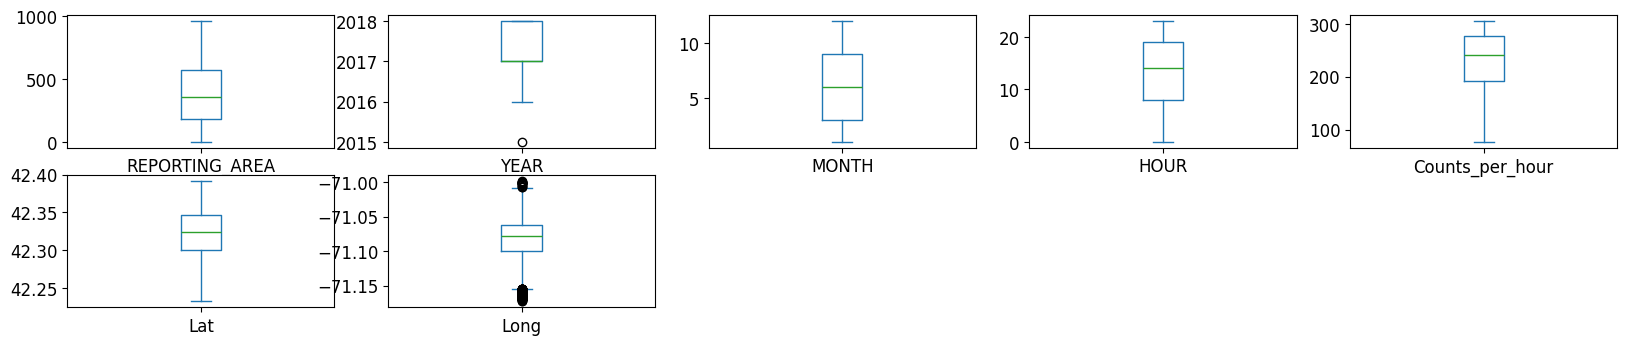

In [25]:
df_contiuous.plot(kind="box", subplots=True, layout= (5,5), fontsize=12, figsize=(20,10));

#subplots erstellt mehrere einzelne plots

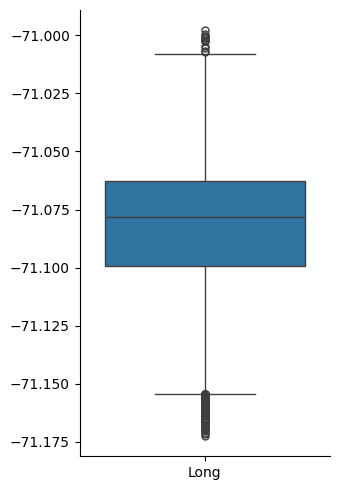

In [26]:
df_new = df[["Long"]]
sns.catplot(kind="box", data=df_new, height=5, aspect=0.7)

In [29]:
# Caluclating the whiskers based on the interquartile:
#    def iqr_fences(column): This line defines a function named iqr_fences that takes one argument called column. This function is designed to work with a pandas Series or any data structure that has the quantile method.
#Q1 = column.quantile(0.25): This line calculates the first quartile (Q1) of the input column. 
# The first quartile is the value below which 25% of the data falls.
#Q3 = column.quantile(0.75): This line calculates the third quartile (Q3) of the input column. 
#IQR = Q3 - Q1: This line calculates the Interquartile Range (IQR) which is the range between the first quartile and the third quartile. 
#lowerFence = Q1 - (1.5 * IQR): This line calculates the lower boundary for potential outliers. It is defined as Q1 - 1.5 * IQR and is used to identify values that are considered "too low" and potentially outliers.
#upperFence = Q3 + (1.5 * IQR): This line calculates the upper boundary for potential outliers. It is defined as Q3 + 1.5 * IQR and is used to identify values that are considered "too high" and potentially outliers.

def iqr_fences(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lowerFence = Q1 - (1.5 * IQR)
    upperFence = Q3 + (1.5 * IQR)
    return lowerFence, upperFence

In [30]:
#This loop iterates over the items (label, content) in the dictionary-like object 
for label, content in df_contiuous.items():
        Q1 = content.quantile(0.25)
        Q3 = content.quantile(0.75)
        IQR = Q3 - Q1
        #These lines calculate the first quartile (Q1), third quartile (Q3), and the interquartile range (IQR) for the data in the current column (content).
        v_col = content[(content <= Q1 - 1.5 * IQR) | (content >= Q3 + 1.5 * IQR)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        #This line calculates the percentage of outliers in the current column (content). It computes the ratio of the number of outliers (np.shape(v_col)[0]) to the total number of rows in the DataFrame (np.shape(df)[0]), and then multiplies by 100 to get the percentage.
        print("Spalte {} Anteil an Outliers = {}%".format(label, round(perc, 2)))

Spalte REPORTING_AREA Anteil an Outliers = 0.0%
Spalte YEAR Anteil an Outliers = 0.02%
Spalte MONTH Anteil an Outliers = 0.0%
Spalte HOUR Anteil an Outliers = 0.0%
Spalte Counts_per_hour Anteil an Outliers = 0.0%
Spalte Lat Anteil an Outliers = 0.0%
Spalte Long Anteil an Outliers = 2.74%


In [31]:
for i in df_contiuous.columns:
    result = iqr_fences(df[i])
    lowerFence = result[0]
    upperFence = result[1]
    print("Lower Fence of {}: {}".format(i,lowerFence))
    print("Upper Fence of {}: {}".format(i, upperFence))

Lower Fence of REPORTING_AREA: -399.0
Upper Fence of REPORTING_AREA: 1161.0
Lower Fence of YEAR: 2015.5
Upper Fence of YEAR: 2019.5
Lower Fence of MONTH: -6.0
Upper Fence of MONTH: 18.0
Lower Fence of HOUR: -8.5
Upper Fence of HOUR: 35.5
Lower Fence of Counts_per_hour: 67.0
Upper Fence of Counts_per_hour: 403.0
Lower Fence of Lat: 42.22962846374999
Upper Fence of Lat: 42.41786413375
Lower Fence of Long: -71.15422621250002
Upper Fence of Long: -71.0076354725


In [24]:
lowerFence, upperFence = iqr_fences(df['Counts_per_hour'])

# Print Statement for whiskers:
print("Min-Whisker: {}".format((lowerFence*1000).round(2)))
print("Max-Whisker: {}".format((upperFence*1000).round(2)))

Min-Whisker: 67000.0
Max-Whisker: 403000.0


In [25]:
# Print number of records which are below and above the max whisker:
print(len(df[df['Counts_per_hour'] > 403000]))
print(len(df[df['Counts_per_hour'] < 403000]))

0
4742


In [32]:
Q1 = df['Counts_per_hour'].quantile(0.25)
Q3 = df['Counts_per_hour'].quantile(0.75)
IQR = Q3 - Q1
MaxW = Q3 + 1.5*IQR
MinW = Q1 - 1.5*IQR

Max_Cons = df[df['Counts_per_hour']>MaxW]
Max_Cons

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_CODE_GROUP_No,OFFENSE_DESCRIPTION,DISTRICT,District_simple,District_simple_No,REPORTING_AREA,OCCURRED_ON_DATE,...,MONTH,DAY_OF_WEEK,WE_Workday,WE_Workday_No,HOUR,Counts_per_hour,STREET,Lat,Long,Location


## <a id='c2'></a>
## <font color='darkblue'>__2. Transformation & Aggregation__</font>

## <a id='data_load'></a>
### <font color='darkblue'>__Data load (for Transformation & Aggregation)__</font>

#### <font color='darkblue'>__→ All data__</font>

In [38]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
%matplotlib inline

C:\Users\pell\AppData\Local\Temp\ipykernel_26284\2205391445.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [33]:
# Read data from your prepared example .csv-file into a dataframe (define seperator)
df_crime_robbery_burglary = pd.read_csv("data/Crime/crime_robbery_burglary.csv", delimiter=';', header=None, skiprows=1, names=['INCIDENT_NUMBER','OFFENSE_CODE','OFFENSE_CODE_GROUP','OFFENSE_CODE_GROUP_No','OFFENSE_DESCRIPTION','DISTRICT','District_simple','District_simple_No','REPORTING_AREA','OCCURRED_ON_DATE','Hour1','Start_Night','Start_Day','Night_Day','YEAR','MONTH','DAY_OF_WEEK','WE_Workday','WE_Workday_No','HOUR','Counts_per_hour','STREET','Lat','Long','Location'], index_col=False)

# Show the content of the dataframe:
df_crime_robbery_burglary

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_CODE_GROUP_No,OFFENSE_DESCRIPTION,DISTRICT,District_simple,District_simple_No,REPORTING_AREA,OCCURRED_ON_DATE,...,MONTH,DAY_OF_WEEK,WE_Workday,WE_Workday_No,HOUR,Counts_per_hour,STREET,Lat,Long,Location
0,I182070908,522,Residential Burglary,1,BURGLARY - RESIDENTIAL - NO FORCE,B2,B,2,911,03.09.2018 18:38,...,9,Monday,Workdays,1,18,285,ANNUNCIATION RD,42.335062,-71.093168,"(42.33506218, -71.09316781)"
1,I182070813,522,Residential Burglary,1,BURGLARY - RESIDENTIAL - NO FORCE,D4,D,4,627,03.09.2018 03:00,...,9,Monday,Workdays,1,3,124,PETERBOROUGH ST,42.342802,-71.100695,"(42.34280177, -71.10069510)"
2,I182070804,522,Residential Burglary,1,BURGLARY - RESIDENTIAL - NO FORCE,D14,D,4,756,03.09.2018 11:00,...,9,Monday,Workdays,1,11,193,CHAMPNEY ST,42.352412,-71.168788,"(42.35241230, -71.16878833)"
3,I182070706,520,Residential Burglary,1,BURGLARY - RESIDENTIAL - FORCE,C11,C,3,402,02.09.2018 23:33,...,9,Sunday,Weekend,2,23,231,BURT ST,42.284135,-71.069574,"(42.28413536, -71.06957385)"
4,I182070571,520,Residential Burglary,1,BURGLARY - RESIDENTIAL - FORCE,B2,B,2,317,02.09.2018 14:39,...,9,Sunday,Weekend,2,14,242,HOMESTEAD ST,42.310144,-71.087592,"(42.31014403, -71.08759179)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4746,I162087225,301,Robbery,2,ROBBERY - STREET,B2,B,2,909,24.10.2016 16:47,...,10,Monday,Workdays,1,16,231,CABOT ST,42.333382,-71.087454,"(42.33338200, -71.08745421)"
4747,I162087026,301,Robbery,2,ROBBERY - STREET,A1,A,1,120,24.10.2016 03:40,...,10,Monday,Workdays,1,3,124,BOYLSTON ST,42.352418,-71.065255,"(42.35241815, -71.06525499)"
4748,I162086984,311,Robbery,2,ROBBERY - COMMERCIAL,B3,B,2,469,23.10.2016 20:35,...,10,Sunday,Weekend,2,20,305,WALK HILL ST,42.280827,-71.097547,"(42.28082671, -71.09754718)"
4749,I162086982,301,Robbery,2,ROBBERY - STREET,E18,E,5,498,23.10.2016 21:18,...,10,Sunday,Weekend,2,21,303,NAVARRE ST,42.274581,-71.117665,"(42.27458078, -71.11766502)"


In [34]:
df_crime_robbery_burglary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4751 entries, 0 to 4750
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   INCIDENT_NUMBER        4751 non-null   object 
 1   OFFENSE_CODE           4751 non-null   int64  
 2   OFFENSE_CODE_GROUP     4751 non-null   object 
 3   OFFENSE_CODE_GROUP_No  4751 non-null   int64  
 4   OFFENSE_DESCRIPTION    4751 non-null   object 
 5   DISTRICT               4751 non-null   object 
 6   District_simple        4751 non-null   object 
 7   District_simple_No     4751 non-null   int64  
 8   REPORTING_AREA         4751 non-null   int64  
 9   OCCURRED_ON_DATE       4751 non-null   object 
 10  Hour1                  4751 non-null   object 
 11  Start_Night            4751 non-null   object 
 12  Start_Day              4751 non-null   object 
 13  Night_Day              4751 non-null   object 
 14  YEAR                   4751 non-null   int64  
 15  MONT

#### <font color='darkblue'>__→ The master file for the offense codes__</font>

In [35]:
# Read data from your prepared example .csv-file into a dataframe (define seperator)
df_crime_robbery_burglary_crimecode = pd.read_csv("data/Crime/crime_robbery_burglary_crimecode.csv", delimiter=';', header=None, skiprows=1, names=['OFFENSE_CODE','OFFENSE_CODE_GROUP','OFFENSE_CODE_GROUP_No','OFFENSE_DESCRIPTION'], index_col=False)

# Show the content of the dataframe:
df_crime_robbery_burglary_crimecode

,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_CODE_GROUP_No,OFFENSE_DESCRIPTION
0,522,Residential Burglary,1,BURGLARY - RESIDENTIAL - NO FORCE
1,520,Residential Burglary,1,BURGLARY - RESIDENTIAL - FORCE
2,521,Residential Burglary,1,BURGLARY - RESIDENTIAL - ATTEMPT
3,301,Robbery,2,ROBBERY - STREET
4,361,Robbery,2,ROBBERY - OTHER
5,311,Robbery,2,ROBBERY - COMMERCIAL
6,381,Robbery,2,ROBBERY - CAR JACKING
7,371,Robbery,2,ROBBERY - HOME INVASION
8,351,Robbery,2,ROBBERY - BANK


In [83]:
df_crime_robbery_burglary_crimecode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   OFFENSE_CODE           9 non-null      int64 
 1   OFFENSE_CODE_GROUP     9 non-null      object
 2   OFFENSE_CODE_GROUP_No  9 non-null      int64 
 3   OFFENSE_DESCRIPTION    9 non-null      object
dtypes: int64(2), object(2)
memory usage: 416.0+ bytes


#### <font color='darkblue'>__→ Only the burglaries__</font>

In [36]:
# Read data from your prepared example .csv-file into a dataframe (define seperator)
df_crime_burglary = pd.read_csv("data/Crime/crime_burglary.csv", delimiter=';', header=None, skiprows=1, names=['INCIDENT_NUMBER','OFFENSE_CODE','OFFENSE_CODE_GROUP','OFFENSE_CODE_GROUP_No','OFFENSE_DESCRIPTION','DISTRICT','District_simple','District_simple_No','REPORTING_AREA','OCCURRED_ON_DATE','Hour1','Start_Night','Start_Day','Night_Day','YEAR','MONTH','DAY_OF_WEEK','WE_Workday','WE_Workday_No','HOUR','Counts_per_hour','STREET','Lat','Long','Location'], index_col=False)

# Show the content of the dataframe:
df_crime_burglary

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_CODE_GROUP_No,OFFENSE_DESCRIPTION,DISTRICT,District_simple,District_simple_No,REPORTING_AREA,OCCURRED_ON_DATE,...,MONTH,DAY_OF_WEEK,WE_Workday,WE_Workday_No,HOUR,Counts_per_hour,STREET,Lat,Long,Location
0,I182070908,522,Residential Burglary,1,BURGLARY - RESIDENTIAL - NO FORCE,B2,B,2,911,03.09.2018 18:38,...,9,Monday,Workdays,1,18,285,ANNUNCIATION RD,42.335062,-71.093168,"(42.33506218, -71.09316781)"
1,I182070813,522,Residential Burglary,1,BURGLARY - RESIDENTIAL - NO FORCE,D4,D,4,627,03.09.2018 03:00,...,9,Monday,Workdays,1,3,124,PETERBOROUGH ST,42.342802,-71.100695,"(42.34280177, -71.10069510)"
2,I182070804,522,Residential Burglary,1,BURGLARY - RESIDENTIAL - NO FORCE,D14,D,4,756,03.09.2018 11:00,...,9,Monday,Workdays,1,11,193,CHAMPNEY ST,42.352412,-71.168788,"(42.35241230, -71.16878833)"
3,I182070706,520,Residential Burglary,1,BURGLARY - RESIDENTIAL - FORCE,C11,C,3,402,02.09.2018 23:33,...,9,Sunday,Weekend,2,23,231,BURT ST,42.284135,-71.069574,"(42.28413536, -71.06957385)"
4,I182070571,520,Residential Burglary,1,BURGLARY - RESIDENTIAL - FORCE,B2,B,2,317,02.09.2018 14:39,...,9,Sunday,Weekend,2,14,242,HOMESTEAD ST,42.310144,-71.087592,"(42.31014403, -71.08759179)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2478,I162100283,522,Residential Burglary,1,BURGLARY - RESIDENTIAL - NO FORCE,D4,D,4,620,08.12.2016 00:15,...,12,Thursday,Workdays,1,0,244,HEMENWAY ST,42.346402,-71.089232,"(42.34640207, -71.08923162)"
2479,I162100258,521,Residential Burglary,1,BURGLARY - RESIDENTIAL - ATTEMPT,E13,E,5,569,08.12.2016 19:51,...,12,Thursday,Workdays,1,19,274,WASHINGTON ST,42.304241,-71.109672,"(42.30424082, -71.10967183)"
2480,I162100217,521,Residential Burglary,1,BURGLARY - RESIDENTIAL - ATTEMPT,D4,D,4,152,08.12.2016 08:15,...,12,Thursday,Workdays,1,8,195,MONTGOMERY ST,42.343746,-71.073377,"(42.34374552, -71.07337676)"
2481,I162100113,520,Residential Burglary,1,BURGLARY - RESIDENTIAL - FORCE,D4,D,4,150,08.12.2016 12:22,...,12,Thursday,Workdays,1,12,258,DARTMOUTH ST,42.345326,-71.074974,"(42.34532565, -71.07497385)"


In [85]:
df_crime_burglary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483 entries, 0 to 2482
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   INCIDENT_NUMBER        2483 non-null   object 
 1   OFFENSE_CODE           2483 non-null   int64  
 2   OFFENSE_CODE_GROUP     2483 non-null   object 
 3   OFFENSE_CODE_GROUP_No  2483 non-null   int64  
 4   OFFENSE_DESCRIPTION    2483 non-null   object 
 5   DISTRICT               2483 non-null   object 
 6   District_simple        2483 non-null   object 
 7   District_simple_No     2483 non-null   int64  
 8   REPORTING_AREA         2483 non-null   int64  
 9   OCCURRED_ON_DATE       2483 non-null   object 
 10  Hour1                  2483 non-null   object 
 11  Start_Night            2483 non-null   object 
 12  Start_Day              2483 non-null   object 
 13  Night_Day              2483 non-null   object 
 14  YEAR                   2483 non-null   int64  
 15  MONT

#### <font color='darkblue'>__→ Only the robberies__</font>

In [37]:
# Read data from your prepared example .csv-file into a dataframe (define seperator)
df_crime_robbery = pd.read_csv("data/Crime/crime_robbery.csv", delimiter=';', header=None, skiprows=1, names=['INCIDENT_NUMBER','OFFENSE_CODE','OFFENSE_CODE_GROUP','OFFENSE_CODE_GROUP_No','OFFENSE_DESCRIPTION','DISTRICT','District_simple','District_simple_No','REPORTING_AREA','OCCURRED_ON_DATE','Hour1','Start_Night','Start_Day','Night_Day','YEAR','MONTH','DAY_OF_WEEK','WE_Workday','WE_Workday_No','HOUR','Counts_per_hour','STREET','Lat','Long','Location'], index_col=False)

# Show the content of the dataframe:
df_crime_robbery

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_CODE_GROUP_No,OFFENSE_DESCRIPTION,DISTRICT,District_simple,District_simple_No,REPORTING_AREA,OCCURRED_ON_DATE,...,MONTH,DAY_OF_WEEK,WE_Workday,WE_Workday_No,HOUR,Counts_per_hour,STREET,Lat,Long,Location
0,I182070931,301,Robbery,2,ROBBERY - STREET,C6,C,3,177,03.09.2018 20:48,...,9,Monday,Workdays,1,20,305,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
1,I182070795,301,Robbery,2,ROBBERY - STREET,C11,C,3,362,02.09.2018 20:30,...,9,Sunday,Weekend,2,20,305,LYNDHURST ST,42.292906,-71.069558,"(42.29290563, -71.06955795)"
2,I182070741,301,Robbery,2,ROBBERY - STREET,D14,D,4,805,03.09.2018 03:26,...,9,Monday,Workdays,1,3,124,PORTSMOUTH ST,42.360533,-71.144263,"(42.36053257, -71.14426332)"
3,I182070621,361,Robbery,2,ROBBERY - OTHER,A7,A,1,23,02.09.2018 18:09,...,9,Sunday,Weekend,2,18,285,MARION ST,42.377256,-71.036674,"(42.37725644, -71.03667354)"
4,I182070598,311,Robbery,2,ROBBERY - COMMERCIAL,A15,A,1,60,02.09.2018 17:15,...,9,Sunday,Weekend,2,17,277,RUTHERFORD AVE,42.371673,-71.063264,"(42.37167264, -71.06326413)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,I162087225,301,Robbery,2,ROBBERY - STREET,B2,B,2,909,24.10.2016 16:47,...,10,Monday,Workdays,1,16,231,CABOT ST,42.333382,-71.087454,"(42.33338200, -71.08745421)"
2264,I162087026,301,Robbery,2,ROBBERY - STREET,A1,A,1,120,24.10.2016 03:40,...,10,Monday,Workdays,1,3,124,BOYLSTON ST,42.352418,-71.065255,"(42.35241815, -71.06525499)"
2265,I162086984,311,Robbery,2,ROBBERY - COMMERCIAL,B3,B,2,469,23.10.2016 20:35,...,10,Sunday,Weekend,2,20,305,WALK HILL ST,42.280827,-71.097547,"(42.28082671, -71.09754718)"
2266,I162086982,301,Robbery,2,ROBBERY - STREET,E18,E,5,498,23.10.2016 21:18,...,10,Sunday,Weekend,2,21,303,NAVARRE ST,42.274581,-71.117665,"(42.27458078, -71.11766502)"


In [87]:
df_crime_robbery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268 entries, 0 to 2267
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   INCIDENT_NUMBER        2268 non-null   object 
 1   OFFENSE_CODE           2268 non-null   int64  
 2   OFFENSE_CODE_GROUP     2268 non-null   object 
 3   OFFENSE_CODE_GROUP_No  2268 non-null   int64  
 4   OFFENSE_DESCRIPTION    2268 non-null   object 
 5   DISTRICT               2268 non-null   object 
 6   District_simple        2268 non-null   object 
 7   District_simple_No     2268 non-null   int64  
 8   REPORTING_AREA         2268 non-null   int64  
 9   OCCURRED_ON_DATE       2268 non-null   object 
 10  Hour1                  2268 non-null   object 
 11  Start_Night            2268 non-null   object 
 12  Start_Day              2268 non-null   object 
 13  Night_Day              2268 non-null   object 
 14  YEAR                   2268 non-null   int64  
 15  MONT

## <a id='remove'></a>
### <font color='darkblue'>__Remove__</font>

In [38]:
import pandas as pd
import numpy as np

In [ ]:
from IPython.display import Image
Image("img/pandas_logo.png", width=200)

##### Source & additional information: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [41]:
df_remove = pd.DataFrame(np.arange(12).reshape(3, 4), columns=['A', 'B', 'C', 'D'])
df_remove

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [42]:
df_remove.drop(['B', 'C'], axis=1)

,A,D
0,0,3
1,4,7
2,8,11


In [43]:
df_remove.drop(columns=['B', 'C'])

,A,D
0,0,3
1,4,7
2,8,11


In [55]:
df_remove.drop([0, 1])

,A,B,C,D
2,8,9,10,11


In [44]:
midx = pd.MultiIndex(levels=[['lama', 'cow', 'falcon'],
                             ['speed', 'weight', 'length']],
                     codes=[[0, 0, 0, 1, 1, 1, 2, 2, 2],
                            [0, 1, 2, 0, 1, 2, 0, 1, 2]])

df_remove = pd.DataFrame(index=midx, columns=['big', 'small'],
                  data=[[45, 30], [200, 100], [1.5, 1], [30, 20],
                        [250, 150], [1.5, 0.8], [320, 250],
                        [1, 0.8], [0.3, 0.2]])
df_remove

big  small
lama   speed    45.0   30.0
       weight  200.0  100.0
       length    1.5    1.0
cow    speed    30.0   20.0
       weight  250.0  150.0
       length    1.5    0.8
falcon speed   320.0  250.0
       weight    1.0    0.8
       length    0.3    0.2

In [57]:
df_remove.drop(index='cow', columns='small')

big
lama   speed    45.0
       weight  200.0
       length    1.5
falcon speed   320.0
       weight    1.0
       length    0.3

In [58]:
df_remove.drop(index='length', level=1)

big  small
lama   speed    45.0   30.0
       weight  200.0  100.0
cow    speed    30.0   20.0
       weight  250.0  150.0
falcon speed   320.0  250.0
       weight    1.0    0.8

### 
### <font color='darkblue'>__Applying Remove on Crime Data__</font>

In [45]:
df_remove_crime = df
df_remove_crime.drop(columns=['OFFENSE_CODE_GROUP', 'OFFENSE_DESCRIPTION', 'DISTRICT', 'District_simple', 'DAY_OF_WEEK', 'WE_Workday', 'STREET'])

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP_No,District_simple_No,REPORTING_AREA,OCCURRED_ON_DATE,Hour1,Start_Night,Start_Day,Night_Day,YEAR,MONTH,WE_Workday_No,HOUR,Counts_per_hour,Lat,Long,Location
0,I182070908,522,1,2,911,03.09.2018 18:38,18:38:00,17:00:00,08:00:00,Night,2018,9,1,18,285,42.335062,-71.093168,"(42.33506218, -71.09316781)"
2,I182070813,522,1,4,627,03.09.2018 03:00,03:00:00,17:00:00,08:00:00,Night,2018,9,1,3,124,42.342802,-71.100695,"(42.34280177, -71.10069510)"
3,I182070804,522,1,4,756,03.09.2018 11:00,11:00:00,17:00:00,08:00:00,Day,2018,9,1,11,193,42.352412,-71.168788,"(42.35241230, -71.16878833)"
4,I182070706,520,1,3,402,02.09.2018 23:33,23:33:00,17:00:00,08:00:00,Night,2018,9,2,23,231,42.284135,-71.069574,"(42.28413536, -71.06957385)"
5,I182070571,520,1,2,317,02.09.2018 14:39,14:39:00,17:00:00,08:00:00,Day,2018,9,2,14,242,42.310144,-71.087592,"(42.31014403, -71.08759179)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,I162087225,301,2,2,909,24.10.2016 16:47,16:47:00,17:00:00,08:00:00,Day,2016,10,1,16,231,42.333382,-71.087454,"(42.33338200, -71.08745421)"
4748,I162087026,301,2,1,120,24.10.2016 03:40,03:40:00,17:00:00,08:00:00,Night,2016,10,1,3,124,42.352418,-71.065255,"(42.35241815, -71.06525499)"
4749,I162086984,311,2,2,469,23.10.2016 20:35,20:35:00,17:00:00,08:00:00,Night,2016,10,2,20,305,42.280827,-71.097547,"(42.28082671, -71.09754718)"
4750,I162086982,301,2,5,498,23.10.2016 21:18,21:18:00,17:00:00,08:00:00,Night,2016,10,2,21,303,42.274581,-71.117665,"(42.27458078, -71.11766502)"


## <a id='concatenate'></a>
### <font color='darkblue'>__Concatenate__</font>

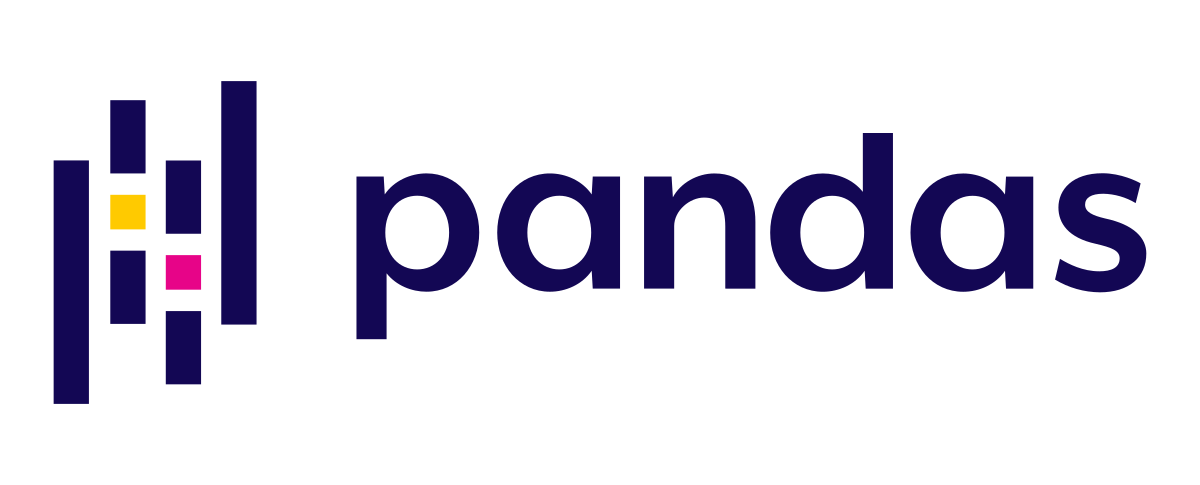

In [45]:
from IPython.display import Image
Image("img/pandas_logo.png", width=200)

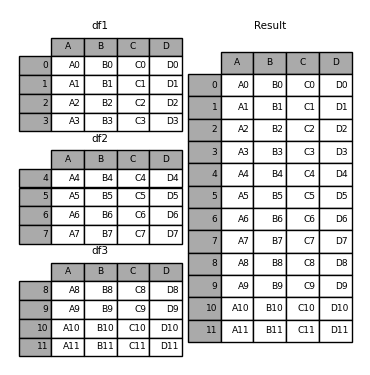

In [46]:
from IPython.display import Image
Image("img/concat.png", width=350)

##### Source & additional information: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

In [60]:
df_concat1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3'],
'C': ['C0', 'C1', 'C2', 'C3'],
'D': ['D0', 'D1', 'D2', 'D3']},
index=[0, 1, 2, 3])

df_concat2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
'B': ['B4', 'B5', 'B6', 'B7'],
'C': ['C4', 'C5', 'C6', 'C7'],
'D': ['D4', 'D5', 'D6', 'D7']},
index=[4, 5, 6, 7])

df_concat3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
'B': ['B8', 'B9', 'B10', 'B11'],
'C': ['C8', 'C9', 'C10', 'C11'],
'D': ['D8', 'D9', 'D10', 'D11']},
index=[8, 9, 10, 11])

frames = [df_concat1, df_concat2, df_concat3]

result = pd.concat(frames)

result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [61]:
result = pd.concat(frames, keys=['x', 'y', 'z'])
#In this case, after concatenation, the resulting DataFrame will have three levels of hierarchical indexing labeled as 'x', 'y', and 'z'.
#x for 0,1,2,3 y for 4,5,6,7

In [62]:
result.loc['y']
#Calling result.loc['y'] will return all the data associated with the key 'y'.

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [49]:
df_concat1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3'],
'C': ['C0', 'C1', 'C2', 'C3'],
'D': ['D0', 'D1', 'D2', 'D3']},
index=[0, 1, 2, 3])

df_concat4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
'D': ['D2', 'D3', 'D6', 'D7'],
'F': ['F2', 'F3', 'F6', 'F7']},
index=[2, 3, 6, 7])

result = pd.concat([df_concat1, df_concat4], axis=1, sort=False)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [50]:
result = pd.concat([df_concat1, df_concat4], axis=1, join='inner')
#inner will only show the same for both so 2,3 is in both df concat 1 and 4
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [53]:
result = pd.concat([df_concat1, df_concat4], axis=1).reindex(df_concat1.index)
result

#reindex only showing the one position from both and rest from 1

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [54]:
pd.concat([df_concat1, df_concat4.reindex(df_concat1.index)], axis=1)


,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


### 
### <font color='darkblue'>__Applying Concatenate on Crime Data__</font>

In [55]:
frames = [df_crime_burglary, df_crime_robbery]

result = pd.concat(frames)

result

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_CODE_GROUP_No,OFFENSE_DESCRIPTION,DISTRICT,District_simple,District_simple_No,REPORTING_AREA,OCCURRED_ON_DATE,...,MONTH,DAY_OF_WEEK,WE_Workday,WE_Workday_No,HOUR,Counts_per_hour,STREET,Lat,Long,Location
0,I182070908,522,Residential Burglary,1,BURGLARY - RESIDENTIAL - NO FORCE,B2,B,2,911,03.09.2018 18:38,...,9,Monday,Workdays,1,18,285,ANNUNCIATION RD,42.335062,-71.093168,"(42.33506218, -71.09316781)"
1,I182070813,522,Residential Burglary,1,BURGLARY - RESIDENTIAL - NO FORCE,D4,D,4,627,03.09.2018 03:00,...,9,Monday,Workdays,1,3,124,PETERBOROUGH ST,42.342802,-71.100695,"(42.34280177, -71.10069510)"
2,I182070804,522,Residential Burglary,1,BURGLARY - RESIDENTIAL - NO FORCE,D14,D,4,756,03.09.2018 11:00,...,9,Monday,Workdays,1,11,193,CHAMPNEY ST,42.352412,-71.168788,"(42.35241230, -71.16878833)"
3,I182070706,520,Residential Burglary,1,BURGLARY - RESIDENTIAL - FORCE,C11,C,3,402,02.09.2018 23:33,...,9,Sunday,Weekend,2,23,231,BURT ST,42.284135,-71.069574,"(42.28413536, -71.06957385)"
4,I182070571,520,Residential Burglary,1,BURGLARY - RESIDENTIAL - FORCE,B2,B,2,317,02.09.2018 14:39,...,9,Sunday,Weekend,2,14,242,HOMESTEAD ST,42.310144,-71.087592,"(42.31014403, -71.08759179)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,I162087225,301,Robbery,2,ROBBERY - STREET,B2,B,2,909,24.10.2016 16:47,...,10,Monday,Workdays,1,16,231,CABOT ST,42.333382,-71.087454,"(42.33338200, -71.08745421)"
2264,I162087026,301,Robbery,2,ROBBERY - STREET,A1,A,1,120,24.10.2016 03:40,...,10,Monday,Workdays,1,3,124,BOYLSTON ST,42.352418,-71.065255,"(42.35241815, -71.06525499)"
2265,I162086984,311,Robbery,2,ROBBERY - COMMERCIAL,B3,B,2,469,23.10.2016 20:35,...,10,Sunday,Weekend,2,20,305,WALK HILL ST,42.280827,-71.097547,"(42.28082671, -71.09754718)"
2266,I162086982,301,Robbery,2,ROBBERY - STREET,E18,E,5,498,23.10.2016 21:18,...,10,Sunday,Weekend,2,21,303,NAVARRE ST,42.274581,-71.117665,"(42.27458078, -71.11766502)"


## <a id='join'></a>
### <font color='darkblue'>__Join__</font>

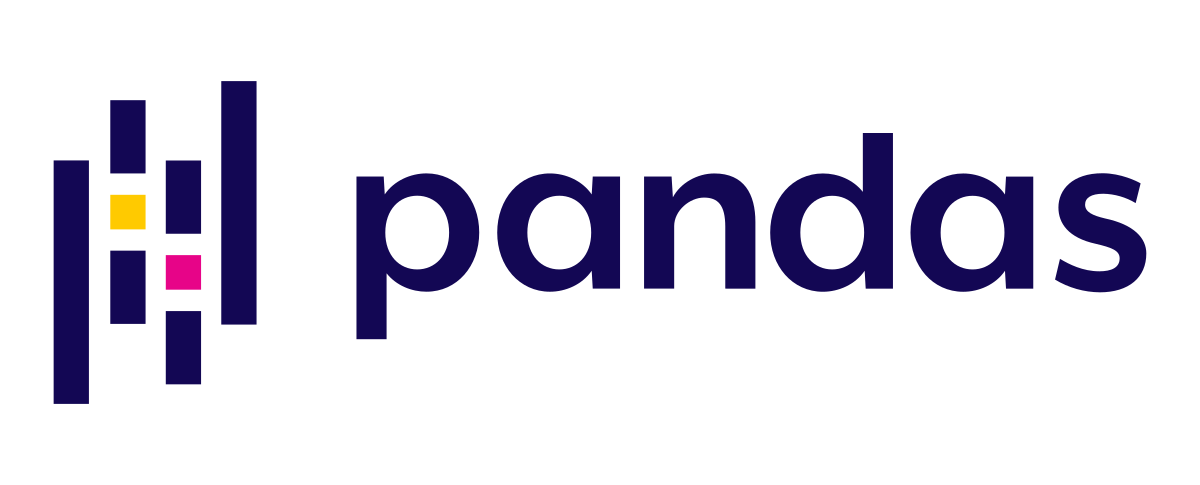

In [62]:
from IPython.display import Image
Image("img/pandas_logo.png", width=200)

##### Source & additional information: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html

In [56]:
df_join = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3', 'K4', 'K5'],
                   'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5']})
df_join

,key,A
0,K0,A0
1,K1,A1
2,K2,A2
3,K3,A3
4,K4,A4
5,K5,A5


In [57]:
other = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
                      'B': ['B0', 'B1', 'B2']})
other

,key,B
0,K0,B0
1,K1,B1
2,K2,B2


In [58]:
df_join.join(other, lsuffix='_caller', rsuffix='_other')

,key_caller,A,key_other,B
0,K0,A0,K0,B0
1,K1,A1,K1,B1
2,K2,A2,K2,B2
3,K3,A3,NaN,NaN
4,K4,A4,NaN,NaN
5,K5,A5,NaN,NaN


In [59]:
df_join.set_index('key').join(other.set_index('key'))

,A,B
key,,
K0,A0,B0
K1,A1,B1
K2,A2,B2
K3,A3,NaN
K4,A4,NaN
K5,A5,NaN


In [60]:
df_join.join(other.set_index('key'), on='key')

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,NaN
4,K4,A4,NaN
5,K5,A5,NaN


### 
### <font color='darkblue'>__Applying Join on Crime Data__</font>

In [75]:
df.join(df_crime_robbery_burglary_crimecode, lsuffix='_caller', rsuffix='_other')

,INCIDENT_NUMBER,OFFENSE_CODE_caller,OFFENSE_CODE_GROUP_caller,OFFENSE_CODE_GROUP_No_caller,OFFENSE_DESCRIPTION_caller,DISTRICT,District_simple,District_simple_No,REPORTING_AREA,OCCURRED_ON_DATE,...,HOUR,Counts_per_hour,STREET,Lat,Long,Location,OFFENSE_CODE_other,OFFENSE_CODE_GROUP_other,OFFENSE_CODE_GROUP_No_other,OFFENSE_DESCRIPTION_other
0,I182070908,522,Residential Burglary,1,BURGLARY - RESIDENTIAL - NO FORCE,B2,B,2,911,03.09.2018 18:38,...,18,285,ANNUNCIATION RD,42.335062,-71.093168,"(42.33506218, -71.09316781)",522.0,Residential Burglary,1.0,BURGLARY - RESIDENTIAL - NO FORCE
1,I182070813,522,Residential Burglary,1,BURGLARY - RESIDENTIAL - NO FORCE,D4,D,4,627,03.09.2018 03:00,...,3,124,PETERBOROUGH ST,42.342802,-71.100695,"(42.34280177, -71.10069510)",520.0,Residential Burglary,1.0,BURGLARY - RESIDENTIAL - FORCE
2,I182070804,522,Residential Burglary,1,BURGLARY - RESIDENTIAL - NO FORCE,D14,D,4,756,03.09.2018 11:00,...,11,193,CHAMPNEY ST,42.352412,-71.168788,"(42.35241230, -71.16878833)",521.0,Residential Burglary,1.0,BURGLARY - RESIDENTIAL - ATTEMPT
3,I182070706,520,Residential Burglary,1,BURGLARY - RESIDENTIAL - FORCE,C11,C,3,402,02.09.2018 23:33,...,23,231,BURT ST,42.284135,-71.069574,"(42.28413536, -71.06957385)",301.0,Robbery,2.0,ROBBERY - STREET
4,I182070571,520,Residential Burglary,1,BURGLARY - RESIDENTIAL - FORCE,B2,B,2,317,02.09.2018 14:39,...,14,242,HOMESTEAD ST,42.310144,-71.087592,"(42.31014403, -71.08759179)",361.0,Robbery,2.0,ROBBERY - OTHER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4746,I162087225,301,Robbery,2,ROBBERY - STREET,B2,B,2,909,24.10.2016 16:47,...,16,231,CABOT ST,42.333382,-71.087454,"(42.33338200, -71.08745421)",NaN,NaN,NaN,NaN
4747,I162087026,301,Robbery,2,ROBBERY - STREET,A1,A,1,120,24.10.2016 03:40,...,3,124,BOYLSTON ST,42.352418,-71.065255,"(42.35241815, -71.06525499)",NaN,NaN,NaN,NaN
4748,I162086984,311,Robbery,2,ROBBERY - COMMERCIAL,B3,B,2,469,23.10.2016 20:35,...,20,305,WALK HILL ST,42.280827,-71.097547,"(42.28082671, -71.09754718)",NaN,NaN,NaN,NaN
4749,I162086982,301,Robbery,2,ROBBERY - STREET,E18,E,5,498,23.10.2016 21:18,...,21,303,NAVARRE ST,42.274581,-71.117665,"(42.27458078, -71.11766502)",NaN,NaN,NaN,NaN


## <a id='merge'></a>
### <font color='darkblue'>__Merge__</font>

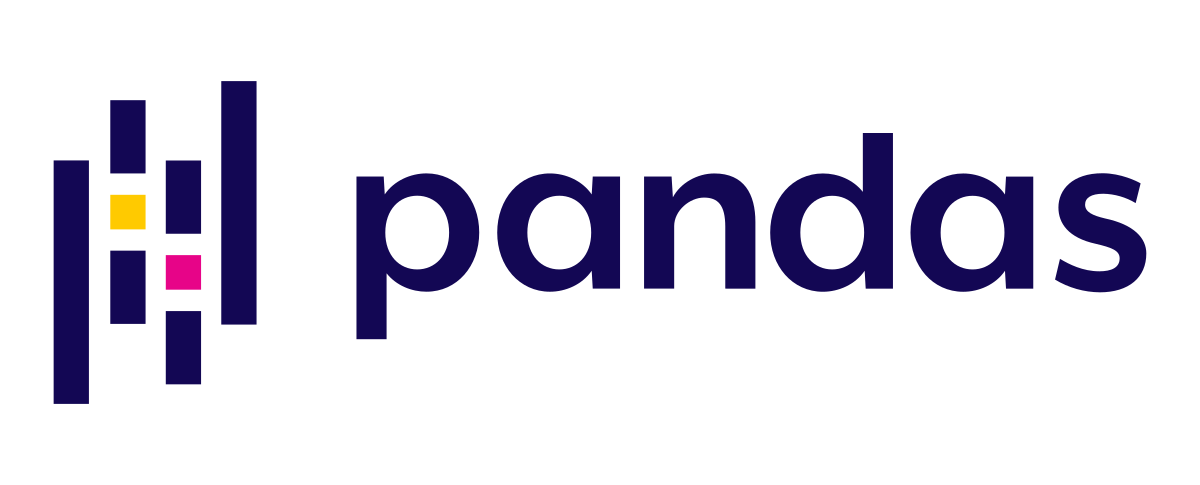

In [69]:
from IPython.display import Image
Image("img/pandas_logo.png", width=200)

##### Source & additional information: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

In [62]:
df_merge1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3'],
'C': ['C0', 'C1', 'C2', 'C3'],
'D': ['D0', 'D1', 'D2', 'D3']},
index=[0, 1, 2, 3])

df_merge2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
'B': ['B4', 'B5', 'B6', 'B7'],
'C': ['C4', 'C5', 'C6', 'C7'],
'D': ['D4', 'D5', 'D6', 'D7']},
index=[4, 5, 6, 7])

df_merge3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
'B': ['B8', 'B9', 'B10', 'B11'],
'C': ['C8', 'C9', 'C10', 'C11'],
'D': ['D8', 'D9', 'D10', 'D11']},
index=[8, 9, 10, 11])

df_merge4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
'D': ['D2', 'D3', 'D6', 'D7'],
'F': ['F2', 'F3', 'F6', 'F7']},
index=[2, 3, 6, 7])

frames = [df_merge1, df_merge2, df_merge3]
frames

[    A   B   C   D
 0  A0  B0  C0  D0
 1  A1  B1  C1  D1
 2  A2  B2  C2  D2
 3  A3  B3  C3  D3,
     A   B   C   D
 4  A4  B4  C4  D4
 5  A5  B5  C5  D5
 6  A6  B6  C6  D6
 7  A7  B7  C7  D7,
       A    B    C    D
 8    A8   B8   C8   D8
 9    A9   B9   C9   D9
 10  A10  B10  C10  D10
 11  A11  B11  C11  D11]

In [77]:
df_merge1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [1, 2, 3, 5]})
df_merge1

,lkey,value
0,foo,1
1,bar,2
2,baz,3
3,foo,5


In [63]:
df_merge2 = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [5, 6, 7, 8]})
df_merge2

,rkey,value
0,foo,5
1,bar,6
2,baz,7
3,foo,8


In [65]:
df_merge1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [1, 2, 3, 5]})
df_merge1.merge(df_merge2, left_on='lkey', right_on='rkey')

,lkey,value_x,rkey,value_y
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


In [66]:
df_merge1.merge(df_merge2, left_on='lkey', right_on='rkey',
          suffixes=('_left', '_right'))

,lkey,value_left,rkey,value_right
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


### 
### <font color='darkblue'>__Applying Merge on Crime Data__</font>

In [67]:
df_crime_burglary.merge(df_crime_robbery, left_on='OFFENSE_CODE_GROUP_No', right_on='OFFENSE_CODE_GROUP_No')

,INCIDENT_NUMBER_x,OFFENSE_CODE_x,OFFENSE_CODE_GROUP_x,OFFENSE_CODE_GROUP_No,OFFENSE_DESCRIPTION_x,DISTRICT_x,District_simple_x,District_simple_No_x,REPORTING_AREA_x,OCCURRED_ON_DATE_x,...,MONTH_y,DAY_OF_WEEK_y,WE_Workday_y,WE_Workday_No_y,HOUR_y,Counts_per_hour_y,STREET_y,Lat_y,Long_y,Location_y


## <a id='aggregate'></a> 
### <font color='darkblue'>__Aggregate__</font>

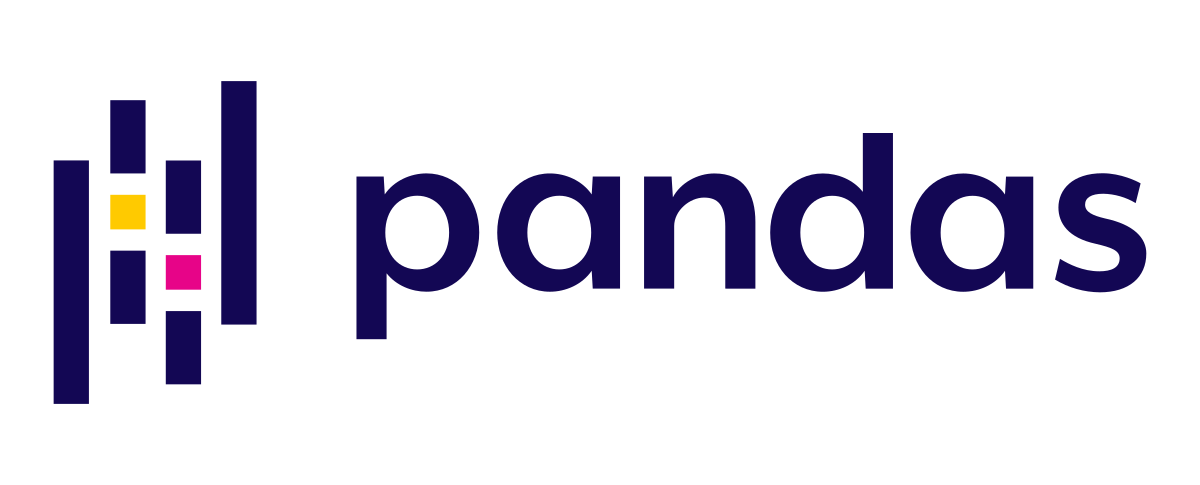

In [76]:
from IPython.display import Image
Image("img/pandas_logo.png", width=200)

##### Source & additional information: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html

In [69]:
df_aggr = pd.DataFrame([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [np.nan, np.nan, np.nan]],
                  columns=['A', 'B', 'C'])
df_aggr

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,6.0
2,7.0,8.0,9.0
3,NaN,NaN,NaN


In [70]:
df_aggr.agg(['sum', 'min'])

,A,B,C
sum,12.0,15.0,18.0
min,1.0,2.0,3.0


In [71]:
df_aggr.agg({'A' : ['sum', 'min'], 'B' : ['min', 'max']})

,A,B
sum,12.0,NaN
min,1.0,2.0
max,NaN,8.0


In [72]:
df_aggr.agg("mean", axis="columns")

0    2.0
1    5.0
2    8.0
3    NaN
dtype: float64

### 
### <font color='darkblue'>__Applying Aggregate on Crime Data__</font>

In [73]:
df.agg(['sum', 'min'])

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_CODE_GROUP_No,OFFENSE_DESCRIPTION,DISTRICT,District_simple,District_simple_No,REPORTING_AREA,OCCURRED_ON_DATE,...,MONTH,DAY_OF_WEEK,WE_Workday,WE_Workday_No,HOUR,Counts_per_hour,STREET,Lat,Long,Location
sum,I182070908I182070813I182070804I182070706I18207...,2006001,Residential BurglaryResidential BurglaryReside...,7009,BURGLARY - RESIDENTIAL - NO FORCEBURGLARY - RE...,B2D4D14C11B2B2C11D4C11D4D14C11A1B3B3A1C11E18D1...,BDDCBBCDCDDCABBACEDEEDBDDCBBADEDBCCDDDABDCEABC...,13712,1880512,03.09.2018 18:3803.09.2018 03:0003.09.2018 11:...,...,29817,MondayMondayMondaySundaySundayFridaySaturdayFr...,WorkdaysWorkdaysWorkdaysWeekendWeekendWorkdays...,5985,62433,1085962,ANNUNCIATION RDPETERBOROUGH STCHAMPNEY STBURT ...,200695.150349,-337075.778939,"(42.33506218, -71.09316781)(42.34280177, -71.1..."
min,I162086948,301,Residential Burglary,1,BURGLARY - RES - NO FORCE,A1,A,1,2,01.01.2017 03:00,...,1,Friday,Weekend,1,0,77,A ST,42.232870,-71.172440,"(42.23287025, -71.13004959)"


In [74]:
# Select only certain columns of your dataframe (if needed)
df_aggr_crime = df[["OFFENSE_CODE_GROUP_No", "Counts_per_hour"]]
df_aggr_crime

,OFFENSE_CODE_GROUP_No,Counts_per_hour
0,1,285
2,1,124
3,1,193
4,1,231
5,1,242
...,...,...
4747,2,231
4748,2,124
4749,2,305
4750,2,303


In [75]:
df_aggr_crime.agg(['sum', 'min', 'max'])

,OFFENSE_CODE_GROUP_No,Counts_per_hour
sum,7009,1085962
min,1,77
max,2,305


## <a id='groupby'></a>
### <font color='darkblue'>__Group by__</font>

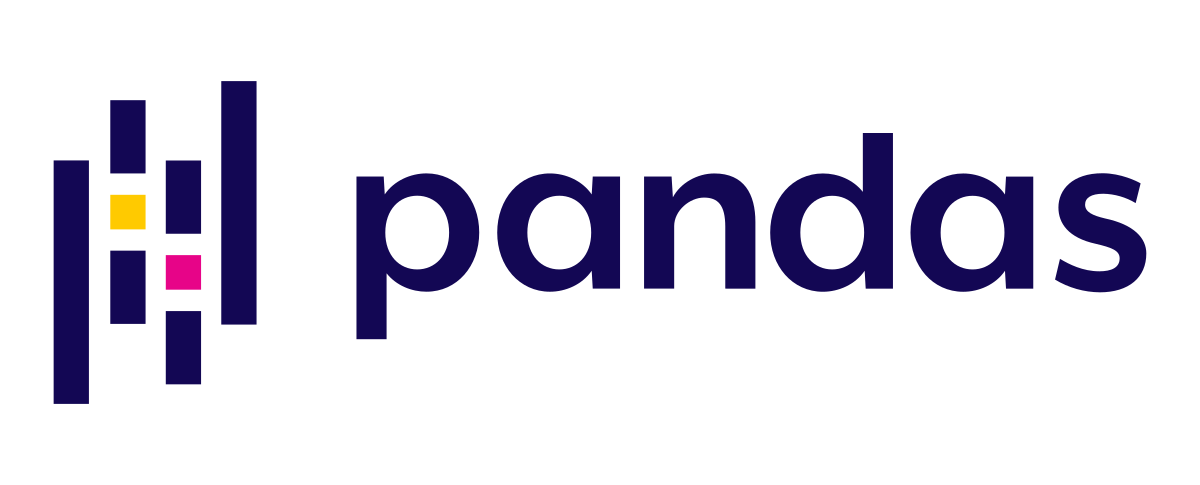

In [84]:
from IPython.display import Image
Image("img/pandas_logo.png", width=200)

##### Source & additional information: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

In [76]:
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df

,Animal,Max Speed
0,Falcon,380.0
1,Falcon,370.0
2,Parrot,24.0
3,Parrot,26.0


In [77]:
df.groupby(['Animal']).mean()

,Max Speed
Animal,
Falcon,375.0
Parrot,25.0


In [78]:
arrays = [['Falcon', 'Falcon', 'Parrot', 'Parrot'],
          ['Captive', 'Wild', 'Captive', 'Wild']]
index = pd.MultiIndex.from_arrays(arrays, names=('Animal', 'Type'))
df = pd.DataFrame({'Max Speed': [390., 350., 30., 20.]},
                  index=index)
df

Max Speed
Animal Type              
Falcon Captive      390.0
       Wild         350.0
Parrot Captive       30.0
       Wild          20.0

In [82]:
df.groupby(level=0).mean()
#man kann animal oder type per 0 und 1 ansprechen 

,Max Speed
Animal,
Falcon,370.0
Parrot,25.0


In [80]:
df.groupby(level="Type").mean()

,Max Speed
Type,
Captive,210.0
Wild,185.0


### 
### <font color='darkblue'>__Applying Group by on Crime Data__</font>

In [85]:
df_aggr_crime.groupby('OFFENSE_CODE_GROUP_No').agg(['sum', 'min', 'max'])

Counts_per_hour         
                                  sum min  max
OFFENSE_CODE_GROUP_No                         
1                              553997  77  305
2                              531965  77  305